Number of atoms in trajectory: 16173


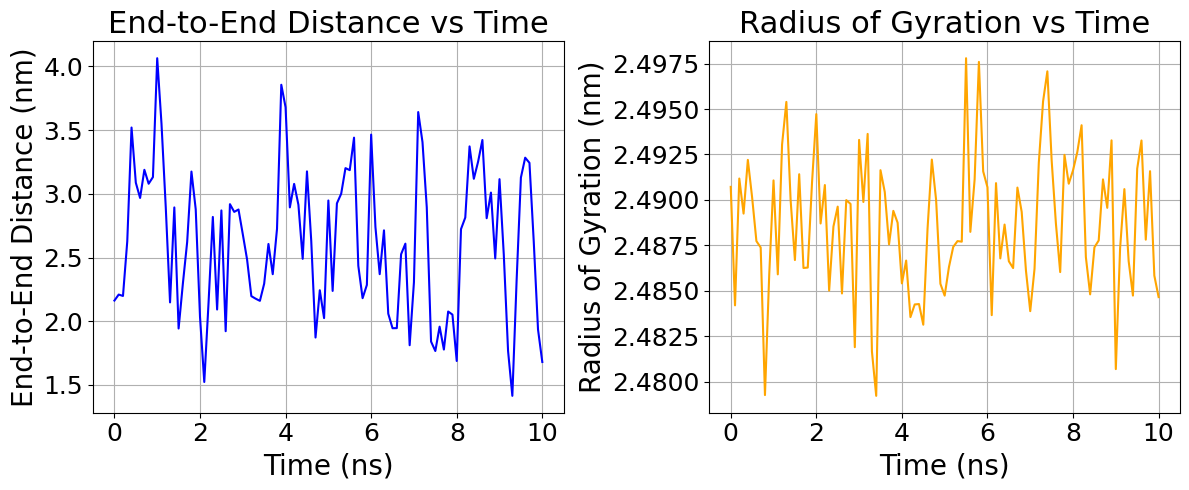

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os

# Create Figures directory if it doesn't exist
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# Load the trajectory and topology
trajectory_file = '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week4-CharmmGuiSetup/Setup/Art-Est_AMBER/gromacs/concatenated.xtc'
topology_file = '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week4-CharmmGuiSetup/Setup/Art-Est_AMBER/gromacs/step4.1_equilibration.gro'  # Or .tpr if available

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Print the number of atoms
print("Number of atoms in trajectory:", traj.n_atoms)

# Ensure there are at least two atoms to compute end-to-end distance
if traj.n_atoms > 1:
    # Compute end-to-end distance, selecting valid atom indices
    end_to_end_distance = md.compute_distances(traj, [[0, traj.n_atoms - 1]])  # Using the first and last atom
else:
    raise ValueError("Not enough atoms to compute end-to-end distance.")

# Calculate radius of gyration
radius_of_gyration = md.compute_rg(traj)

# Create time array (in nanoseconds, assuming your simulation is in ns)
time = traj.time / 1000  # Convert from ps to ns

# Plot End-to-End Distance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, end_to_end_distance, color='blue')
plt.title('End-to-End Distance vs Time', fontsize=22)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('End-to-End Distance (nm)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()

# Plot Radius of Gyration
plt.subplot(1, 2, 2)
plt.plot(time, radius_of_gyration, color='orange')
plt.title('Radius of Gyration vs Time', fontsize=22)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Radius of Gyration (nm)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()

# Save figures to Figures directory
plt.tight_layout()
plt.savefig('../Figures/end_to_end_distance_vs_time.png')
plt.savefig('../Figures/radius_of_gyration_vs_time.png')
plt.show()
